In [44]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary


from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

In [2]:
# Create a deta frame in Python using WestRoxbury.csv file.
marketing_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [3]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )
# It has 5802 rows and 14 columns.

Number of rows and columns in data set: (2240, 29)


In [4]:
# Display the first 5 rows of the dataframe. 
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Display the column names.
print('Original column titles:')
marketing_df.columns

Original column titles:


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# We therefore strip trailing spaces and replace the remaining spaces 
# with an underscore '_'. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe.
print('Modified column titles with no space and one word for titles:')
marketing_df.columns = [s.strip().replace(' ', '_') for s in marketing_df.columns]
marketing_df.columns

Modified column titles with no space and one word for titles:


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# Display column data types. 
marketing_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
# create a list of columns to drop
cols_to_drop = ['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer']

# drop the columns from the DataFrame
marketing_df.drop(cols_to_drop, axis=1, inplace=True)


In [9]:
# Change Year_Birth to Age (Age is more informative)
marketing_df['Age'] = 2023 - marketing_df.Year_Birth.to_numpy()
marketing_df = marketing_df.drop('Year_Birth', axis=1)

In [10]:
marketing_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [11]:
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [12]:
marketing_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
marketing_df['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [14]:
marketing_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Bachelor,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,66
1,Bachelor,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,69
2,Bachelor,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,58
3,Bachelor,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,42


In [15]:
marketing_df.shape

(2240, 25)

In [16]:
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000


In [17]:
# fill missing values with mean income
marketing_df['Income'].fillna(marketing_df['Income'].mean(), inplace=True)

# convert income to thousands of dollars
marketing_df['Income'] /= 1000

In [18]:
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52.247251,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196
std,25.037797,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,1.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,35.538750,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
50%,51.741500,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
75%,68.289750,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,666.666000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000


### Removing outliers

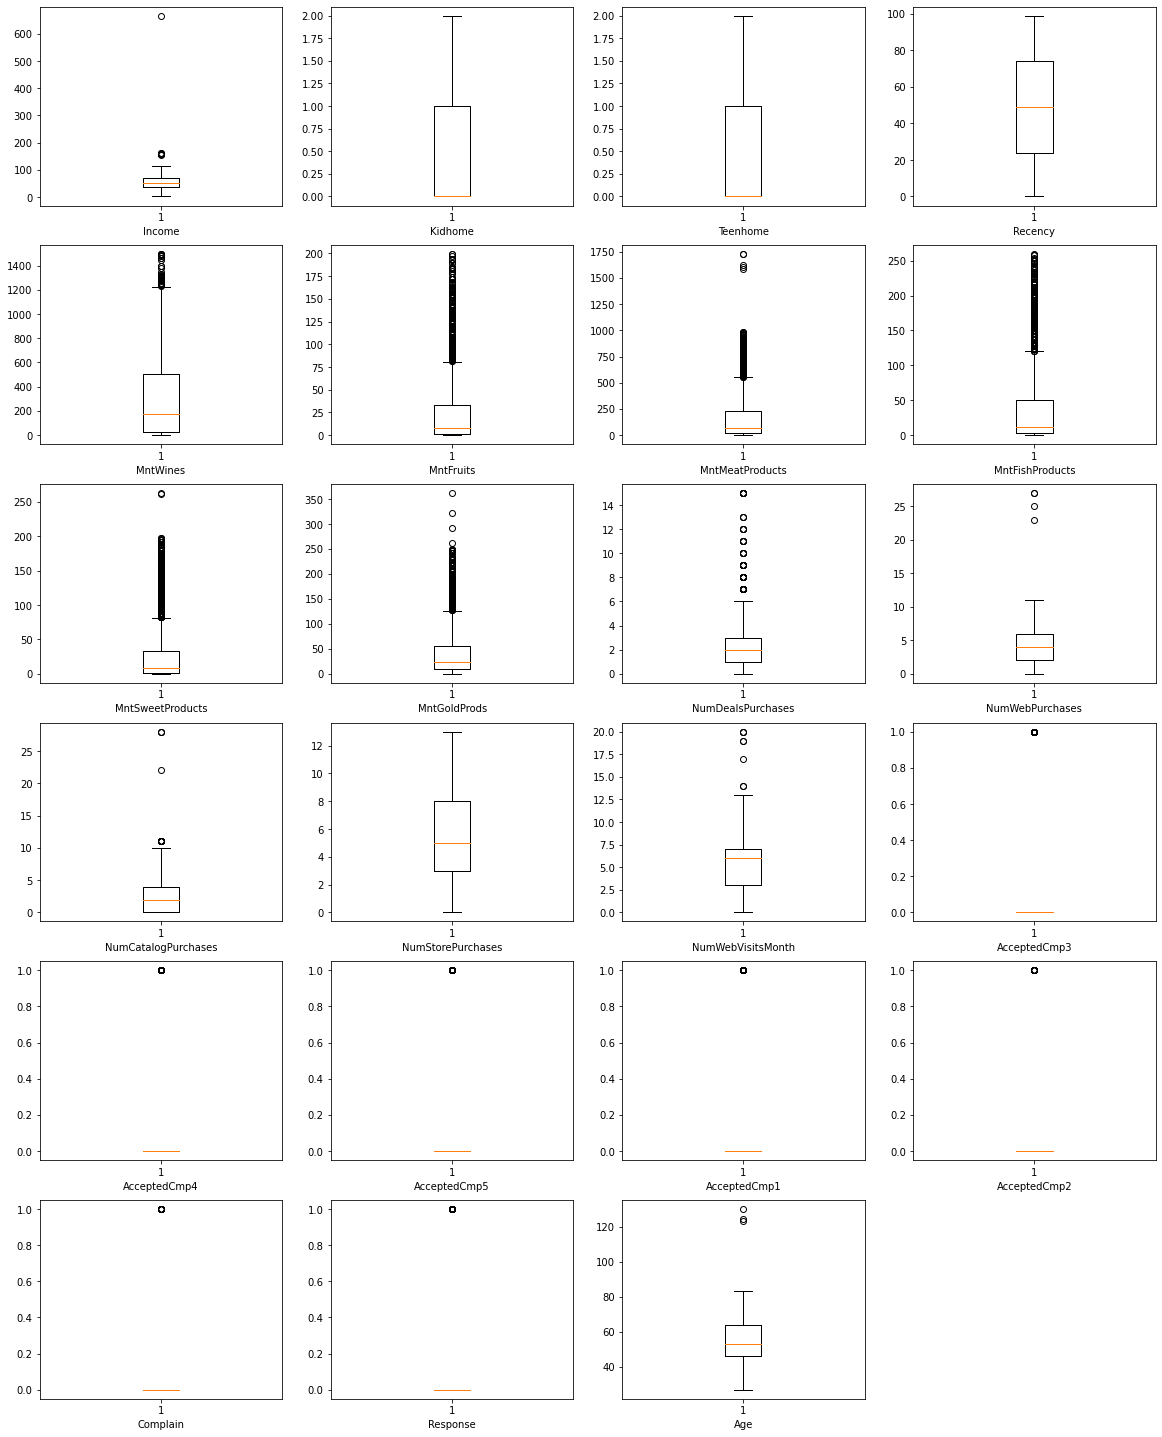

In [19]:
# plot all numerical columns (14)
num_coln = marketing_df.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(marketing_df[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()

In [20]:
marketing_df.drop(marketing_df[(marketing_df['Income']>200)|(marketing_df['Age']>100)].index,inplace=True)

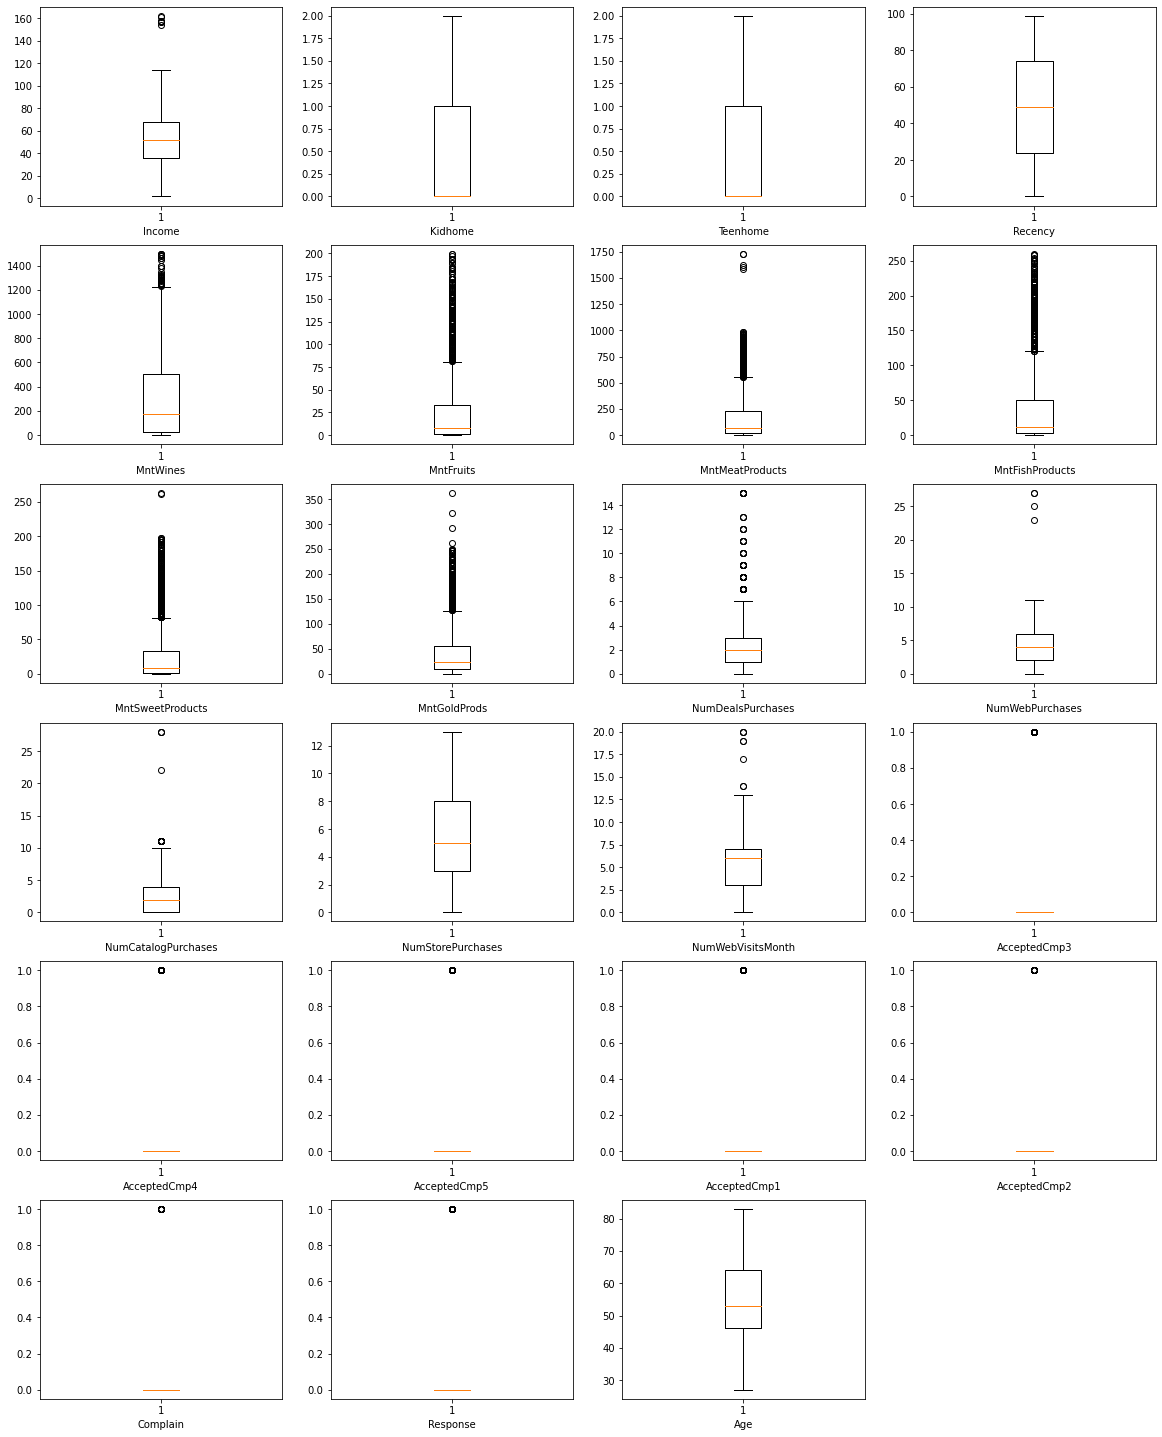

In [21]:
# plot all numerical columns (14)
num_coln = marketing_df.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(marketing_df[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()

In [22]:
# Convert category variable REMODEL into dummy variables, 
# REMODEL_Old and REMODEL_Recent. 
# Use drop_first=True to drop the first dummy variable for 'None'.
marketing_df = pd.get_dummies(marketing_df, prefix_sep='_', 
                            drop_first=True)
marketing_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Education_Basic',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [23]:
# Display the first 5 rows of the dataframe. 
marketing_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58.138,0,0,58,635,88,546,172,88,88,...,0,1,66,0,0,0,0,1,0,0
1,46.344,1,1,38,11,1,6,2,1,6,...,0,0,69,0,0,0,0,1,0,0
2,71.613,0,0,26,426,49,127,111,21,42,...,0,0,58,0,0,0,0,0,1,0
3,26.646,1,0,26,11,4,20,10,3,5,...,0,0,39,0,0,0,0,0,1,0
4,58.293,1,0,94,173,43,118,46,27,15,...,0,0,42,0,0,1,1,0,0,0


In [24]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )

Number of rows and columns in data set: (2236, 30)


In [25]:
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51.961907,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,...,0.008945,0.149374,54.101968,0.02415,0.255367,0.216905,0.386404,0.217352,0.258497,0.034436
std,21.411405,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,...,0.094173,0.356536,11.703281,0.15355,0.436165,0.412230,0.487034,0.412537,0.437907,0.182388
min,1.730000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.502500,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,46.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.684000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,53.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.275750,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,64.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,162.397000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,83.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

## Backward Elimination algorithm.

In [27]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=742.69
Step: score=722.83, remove NumCatalogPurchases
Step: score=702.66, remove MntFruits
Step: score=702.66, remove None

Best Variables from Backward Elimination Algorithm
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'Education_Basic', 'Education_Master', 'Edu

## Developed the logistic regression model based on backward elimination

In [28]:
# Develop the logistic regression model based
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

# logit = -12.105 - 0.052*Age + 0.053*Experience + ... + 4.359*Education_Advanced/Professional


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.2
Coefficients for Predictors
        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Coeff:  -0.004    0.407    -0.996   -0.032     0.001        0.0   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
Coeff:            0.002           -0.001            -0.001         0.003  ...   

        AcceptedCmp2  Complain    Age  Education_Basic  Education_Master  \
Coeff:         1.397    -0.717  0.003            -2.49             0.433   

        Education_PhD  Marital_Status_Married  Marital_Status_Single  \
Coeff:          0.784                  -1.204                 -0.083   

        Marital_Status_Together  Marital_Status_Widow  
Coeff:                   -1.177                  0.53  

[1 rows x 27 columns]


In [29]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model results for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))


Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
664        0               0  0.9918  0.0082
1596       0               0  0.9924  0.0076
1120       0               0  0.9185  0.0815
575        1               0  0.5839  0.4161
674        0               0  0.9368  0.0632
1815       0               0  0.9711  0.0289
2200       0               0  0.9942  0.0058
196        0               0  0.9927  0.0073
828        0               0  0.8880  0.1120
120        0               0  0.9915  0.0085
1657       0               0  0.9935  0.0065
528        0               1  0.4900  0.5100
351        0               1  0.3853  0.6147
195        0               0  0.9695  0.0305
126        1               0  0.6300  0.3700
2185       0               0  0.9552  0.0448
1349       1               0  0.9552  0.0448
1267       0               0  0.9892  0.0108
1328       0               1  0.2340  0.7660
770        0               0  0.9748  0.0252


In [30]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9016)

       Prediction
Actual    0    1
     0 1125   28
     1  104   84

Validation Partition
Confusion Matrix (Accuracy 0.8670)

       Prediction
Actual   0   1
     0 724  25
     1  94  52


## Forward Selection using Logistic Regression

In [31]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

In [32]:
X

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58.138,0,0,58,635,88,546,172,88,88,...,0,0,66,0,0,0,0,1,0,0
1,46.344,1,1,38,11,1,6,2,1,6,...,0,0,69,0,0,0,0,1,0,0
2,71.613,0,0,26,426,49,127,111,21,42,...,0,0,58,0,0,0,0,0,1,0
3,26.646,1,0,26,11,4,20,10,3,5,...,0,0,39,0,0,0,0,0,1,0
4,58.293,1,0,94,173,43,118,46,27,15,...,0,0,42,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61.223,0,1,46,709,43,182,42,118,247,...,0,0,56,0,0,0,1,0,0,0
2236,64.014,2,1,56,406,0,30,0,0,8,...,0,0,77,0,0,1,0,0,1,0
2237,56.981,0,0,91,908,48,217,32,12,24,...,0,0,42,0,0,0,0,0,0,0
2238,69.245,0,1,8,428,30,214,80,30,61,...,0,0,67,0,1,0,0,0,1,0


In [33]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=972.34, constant
Step: score=972.34, add None

Best Variables from Forward Selection Algorithm
[]


## Stepwise using logistic

In [34]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

In [35]:
# Define train_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use stepwise() function to identify the best_model
# and best_variables with Stepwise section algorithm.
best_model_st, best_variables_st = stepwise_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Stepwise algorithm.
print()
print('Best Variables from Stepwise Selection Algorithm')
print(best_variables_st)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=972.34, constant
Step: score=972.34, unchanged None

Best Variables from Stepwise Selection Algorithm
[]


## Logistic Regression using all variables

In [36]:
# Develop the logistic regression model based
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

# logit = -12.105 - 0.052*Age + 0.053*Experience + ... + 4.359*Education_Advanced/Professional


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.215
Coefficients for Predictors
        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Coeff:  -0.007    0.473    -0.979   -0.032     0.001      0.001   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
Coeff:            0.002           -0.001            -0.001         0.003  ...   

        AcceptedCmp2  Complain    Age  Education_Basic  Education_Master  \
Coeff:         1.107    -0.715  0.004           -2.534             0.435   

        Education_PhD  Marital_Status_Married  Marital_Status_Single  \
Coeff:          0.836                  -1.208                 -0.094   

        Marital_Status_Together  Marital_Status_Widow  
Coeff:                   -1.189                 0.441  

[1 rows x 29 columns]


In [37]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model results for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))


Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
664        0               0  0.9924  0.0076
1596       0               0  0.9928  0.0072
1120       0               0  0.9214  0.0786
575        1               0  0.5512  0.4488
674        0               0  0.9434  0.0566
1815       0               0  0.9704  0.0296
2200       0               0  0.9940  0.0060
196        0               0  0.9941  0.0059
828        0               0  0.8972  0.1028
120        0               0  0.9923  0.0077
1657       0               0  0.9937  0.0063
528        0               1  0.4752  0.5248
351        0               1  0.4099  0.5901
195        0               0  0.9691  0.0309
126        1               0  0.6389  0.3611
2185       0               0  0.9131  0.0869
1349       1               0  0.9600  0.0400
1267       0               0  0.9893  0.0107
1328       0               1  0.2154  0.7846
770        0               0  0.9769  0.0231


In [38]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8986)

       Prediction
Actual    0    1
     0 1121   32
     1  104   84

Validation Partition
Confusion Matrix (Accuracy 0.8704)

       Prediction
Actual   0   1
     0 725  24
     1  92  54


# Neural Nets based on backward elimination

In [42]:
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)


# Grid search for Accidents data set.

In [45]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8837
Best parameter:  {'hidden_layer_sizes': 7}


In [48]:
# Create outcome and predictors to run neural network
# model.
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (27); 
# (b) single hidden layer with 7 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (1);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
marketing_clf = MLPClassifier(hidden_layer_sizes=(7), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
marketing_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(marketing_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(marketing_clf.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 2.49551344,  0.33694619, -0.13816322,  0.10846633,  1.31488026,
        0.95901547,  0.20379237]), array([-4.80518483])]

Network Weights for Accidents Neural Network Model
[array([[-5.11807743e-01,  8.74254011e-01, -1.23088783e+00,
        -2.09184047e-01, -4.75943771e+00, -7.20954302e+00,
        -2.80622031e-01],
       [-7.64420765e+00,  2.20006593e+00, -4.72124197e-02,
        -4.05526730e-02,  7.92556674e+00,  1.15638366e+00,
         1.76717347e-01],
       [ 2.05563284e+01, -3.99432284e+00, -6.37944691e-02,
         2.62117325e-02, -1.82813635e+00, -4.29181822e-01,
         1.41294418e-01],
       [ 5.52119516e+00, -2.49657982e+00, -1.15320224e-01,
        -1.03405920e-01, -7.11273770e-01, -5.87550645e+00,
        -2.99127863e-01],
       [-1.65950908e-01,  3.15240024e-01, -1.31582245e+00,
        -5.84003833e-01,  1.12526455e-01, -6.01683762e+00,
        -1.76680287e-01],
       [ 4.59060863e-01, -5.65571017e-01,  1.

In [56]:
# Make marketing response classification for validation set 
# using marketing neural network model. 

# Use accident_clf model to classify accident severity
# for validation set.
marketing_pred = marketing_clf.predict(valid_X)

# Predict accident severity probabilities p(0), p(1),
# and p(2) for validation set.
marketing_pred_prob = np.round(marketing_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
marketing_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in marketing_pred_prob],
                'p(1)': [p[1] for p in marketing_pred_prob],
                
                'Classification': marketing_pred})

print('Classification for Accidents Data for Validation Partition')
print(marketing_pred_result.head(10))

Classification for Accidents Data for Validation Partition
      Actual    p(0)    p(1)  Classification
664        0  0.9989  0.0011               0
1596       0  0.9989  0.0011               0
1120       0  0.9137  0.0863               0
575        1  0.5862  0.4138               0
674        0  0.9137  0.0863               0
1815       0  0.9799  0.0201               0
2200       0  0.9950  0.0050               0
196        0  0.9137  0.0863               0
828        0  0.9137  0.0863               0
120        0  0.9137  0.0863               0


In [57]:

# Confusion matrices for Accidents neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, marketing_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, marketing_clf.predict(valid_X))




Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8628)

       Prediction
Actual    0    1
     0 1152    1
     1  183    5

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8324)

       Prediction
Actual   0   1
     0 742   7
     1 143   3
